In [1]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import bioread

    1. La señal del archivo EMG.acq, muestreada a 2kHz, corresponde a un registro de EMG durante un movimiento de abducción-aducción durante un poco más de 30s. Con segmentos de 700 ms de longitud: 

    (a) Construye 5 pdf elegidas aleatoriamente. 

    (b) Compara una de ellas con el mejor ajuste de las 4 distribuciones continuas paramétricas: normal, de cauchy, logística y gamma. Emplea como criterio de comparación el valor de la suma de los cuadrados de los desvíos. 

    (c) Determina el valor óptimo de los parámetros de la distribución continua de comparación. 

    (d) Compara 2 de las 5 pdf entre si empleando al menos dos de las métricas estudiadas. Indica el criterio que utilizas para decidir si la señal es estacionaria con segmentos de 700 ms.

In [2]:
EMG = bioread.read_file ("EMG.acq")

In [3]:
EMG.channels

[Channel EMG (30 - 500 Hz): 62489 samples, 2000.0 samples/sec, loaded: True]

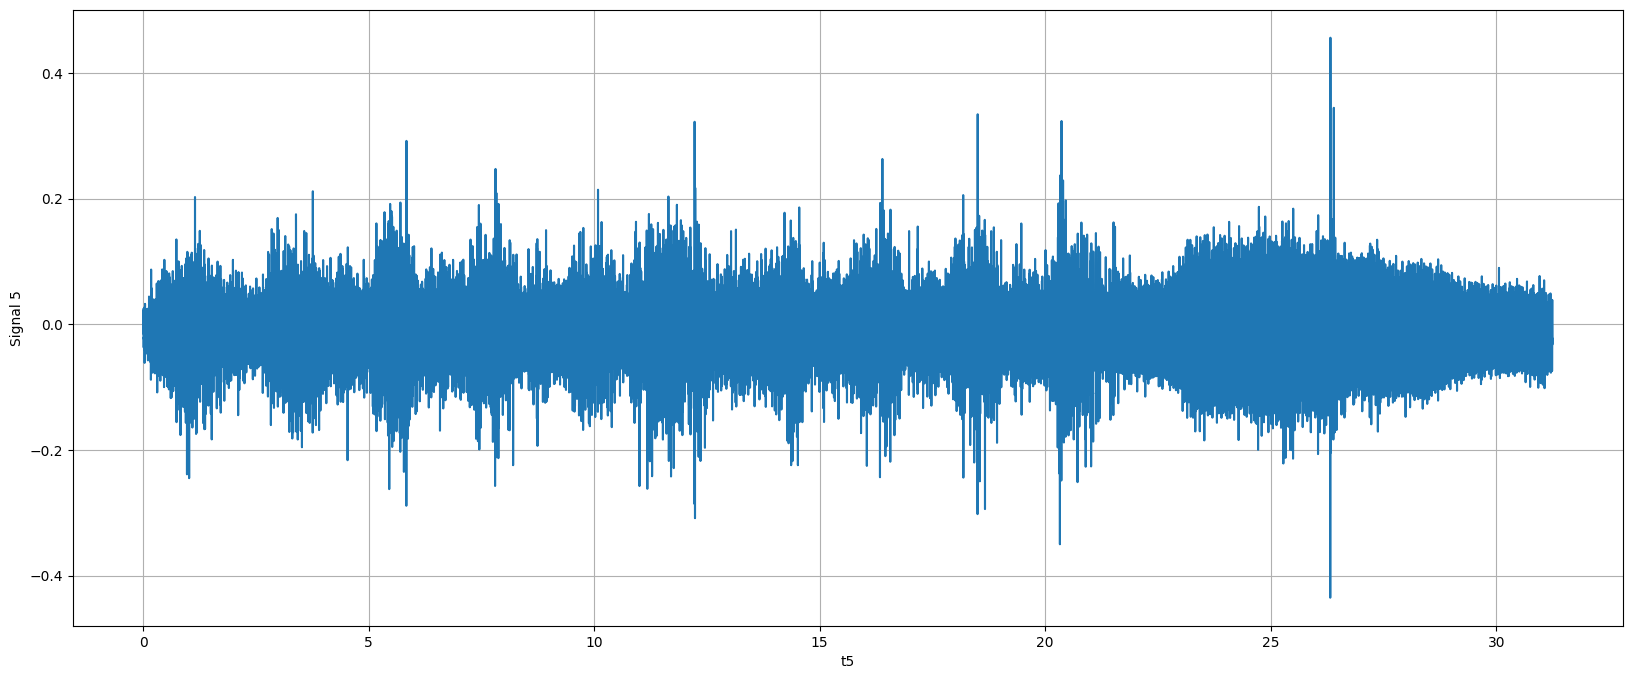

In [4]:
#Vector del tiempo
t = EMG.time_index.T
t

señal = EMG.channels [0].data

plt.figure (figsize =(20,8))
plt.plot (t,señal)
plt.xlabel ("t5")
plt.ylabel ("Signal 5")
plt.grid (True)
plt.show ()

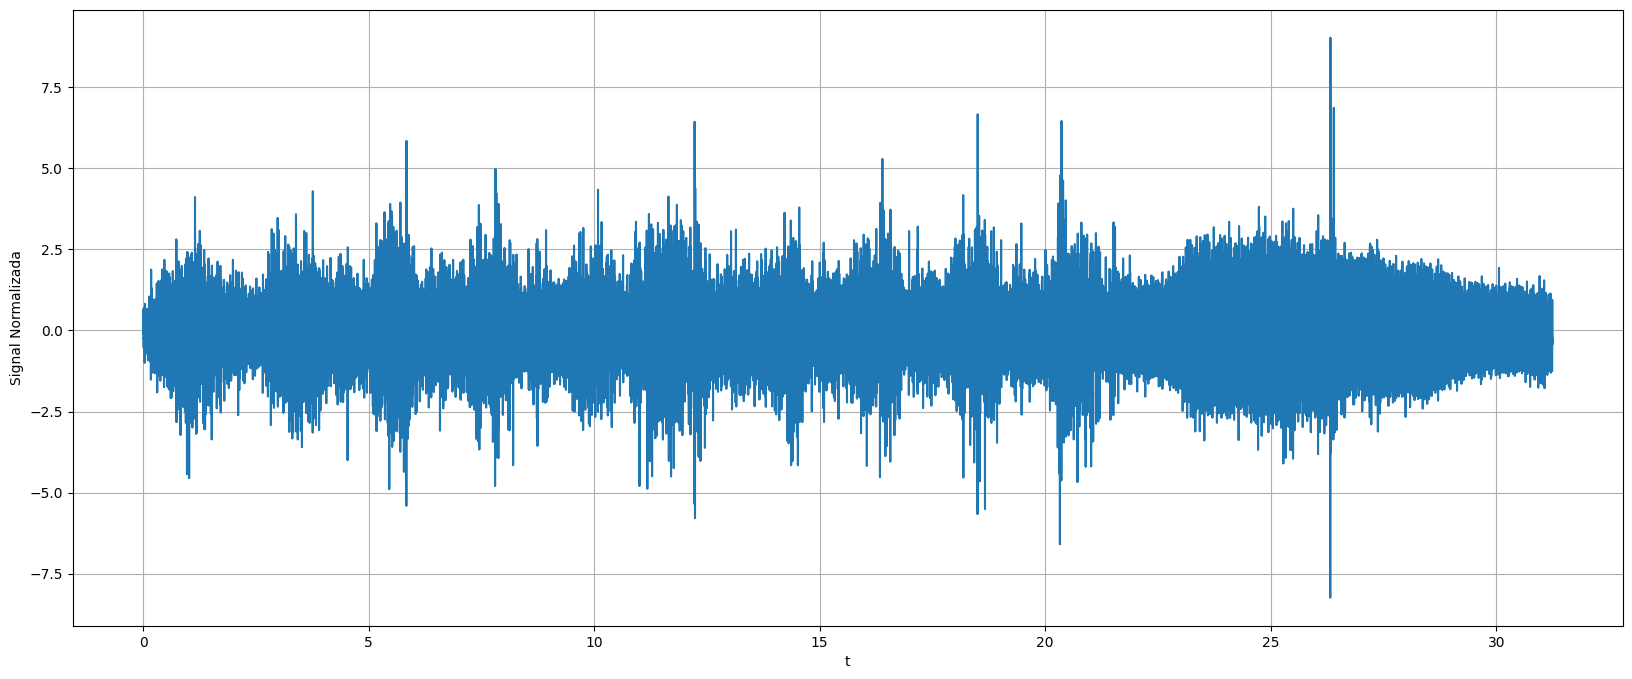

In [5]:
s_norm = (señal - np.mean (señal)) / (np.std (señal))

plt.figure (figsize =(20,8))
plt.plot (t,s_norm)
plt.xlabel ("t")
plt.ylabel ("Signal Normalizada")
plt.grid (True)
#plt.xlim (0,1)
plt.show ()

In [6]:
Fs = 2000
print (len (s_norm) / (Fs*0.7))
seg = int(Fs*0.7)

44.635


In [7]:
from FEstimaciondeunafdp_new1 import pdf_new1

importing Jupyter notebook from FEstimaciondeunafdp_new1.ipynb


In [8]:
bigp = np.empty(0) #Matriz vacía en la que vamos a agregar los datos con lo que vamos a construir los pdf.
#Por cada longitud de segmento tenemos una matriz y cada una de ellas, vamos a elegir 10 filas.

bigY = np.empty(0,dtype=float)

dat = s_norm

Ndat = len(dat)

x0, xf, Np = -8, 8, 24000
d = (xf-x0)/Np #Vector de paso.
x = x0 + d*np.arange(Np)


datos = np.empty((int(seg),0)) #Genero una matriz donde guardaré los datos.
m = Ndat//seg #Cuántas columnas tendrá para cada caso, division: // = N° entero
aux = np.reshape(dat[0:seg*m],(int(seg),int(m)),order= 'F')
datos = np.append(datos, aux, axis=1) #Datos para cada longitud de segmento.
    #Ya inserte los datos para cada longitud de segmento, que se van agregando en forma de columnas.
    #Debo construir las fdp con la misma cantidad de datos.
    #Eleccion aleatoria. Hemos dicho q ibamos a tomar el peor de los casos: 764 columnas .
mi = np.random.choice(int(m),44,replace=False) #Elige aleatoriamente 818 numeros con las columnas que se va a quedar. Esto ya que dividimos en 100 segmentos.
    #Replace=false para que no se repitan los datos.
datos = datos[:,mi] #Nos quedamos con todas las filas y las columnas mi.
    #Hemos creado de nuevo la matriz pero más pequeña y todas las pdf se construiran con la misma cantidad de datos.
r = np.random.choice(seg,5,replace=False) #Elijo las 10 filas aleatoriamente.
p = datos[r,:]
bigp = np.append(bigp, p)
    
y1 = pdf_new1(p[0,:],x0,xf,Np,1); y2 = pdf_new1(p[1,:],x0,xf,Np,1) #1: nombre de la matriz, 2: lo que le agrego.
y3 = pdf_new1(p[2,:],x0,xf,Np,1); y4 = pdf_new1(p[3,:],x0,xf,Np,1) #1:los datos[fila,columnas],desde donde,hasta donde, cantidad de datos, valor que ajusta el ancho de banda.
y5 = pdf_new1(p[4,:],x0,xf,Np,1)

    #MATRIZ P DESDE DONDE SE CONSTRUYEN LAS FUNCIONES 
    #MATRIZ Y QUE JUNTA LAS FUNCIONES CONSTRUIDAS

Y = np.hstack((y1,y2,y3,y4,y5)) #Acumulo horizontalmente
bigY = np.append(bigY, Y)

In [9]:
y = np.reshape(Y, (Np,5),order='F')

In [10]:
y.shape

(24000, 5)

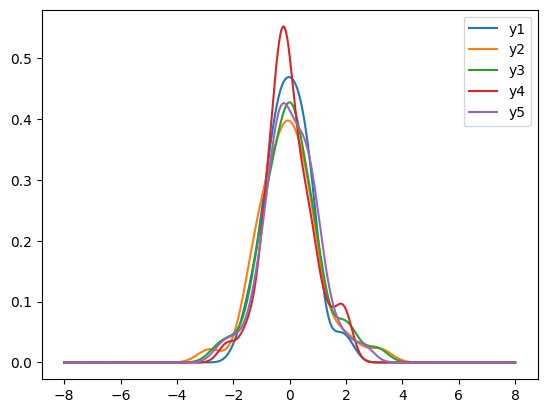

In [11]:
plt.plot(x,y)
plt.legend(('y1','y2','y3','y4','y5'))
plt.show()

In [12]:
from scipy.stats import norm, cauchy, gamma, logistic
from fitter import Fitter

ModuleNotFoundError: No module named 'fitter'

Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 153.80it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,30.209177,488.509094,16.045352,inf,0.123774,0.964712
logistic,30.865586,437.723104,16.346298,inf,0.127384,0.955239
gamma,30.979737,400.719554,19.037036,inf,0.180167,0.689437
norm,31.357475,406.251923,16.567650,inf,0.186791,0.646951


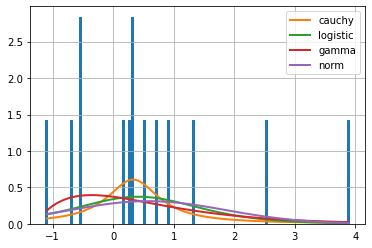

In [ ]:
distribuciones = ['norm','cauchy','gamma',"logistic"]
fitter = Fitter(p[0,:],distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=4,plot=True)

In [ ]:
fitter.fitted_param['cauchy'], fitter.fitted_param['logistic'], fitter.fitted_param['norm'] , fitter.fitted_param['gamma']

((0.04335474528899269, 0.42400115671578475),
 (0.05291506304005808, 0.5121048111372326),
 (0.07636936732335178, 0.9200383842874924),
 (59.15122158400946, -7.001790696128259, 0.11966211235227735))

In [ ]:
x_cauchy = x
y_cauchy = cauchy.pdf(x_cauchy, 0.04335474528899269, 0.42400115671578475)

x_logistic = x
y_logistic = logistic.pdf(x_logistic, 0.05291506304005808, 0.5121048111372326)

x_norm = x
y_norm = norm.pdf(x_norm, 0.07636936732335178, 0.9200383842874924)

x_gamma = x
y_gamma = gamma.pdf(x_gamma, 59.15122158400946, -7.001790696128259, 0.11966211235227735)

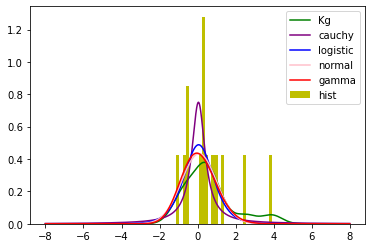

In [ ]:
plt.plot(x,y1,'g')
plt.plot(x_cauchy,y_cauchy,'purple')
plt.plot(x_logistic,y_logistic,'blue')
plt.plot(x_norm,y_norm,'pink')
plt.plot(x_gamma,y_gamma,'red')
plt.hist(p[0,:],bins=30,density=True,color='y')
plt.legend(('Kg','cauchy',"logistic","normal","gamma",'hist'))
plt.show()

In [ ]:
from FSum_of_square_error_SSE import sse

In [ ]:
H = np.histogram(p[0,:],bins=40,density=True)
yH = H[0]; xH = H[1][:-1]

In [ ]:
sse_kG = sse(xH,yH,x,y1)
sse_kG

6.429326220777322

In [ ]:
sse_cauchy = sse(xH,yH,x_cauchy,y_cauchy)
sse_cauchy

6.056130508767071

In [ ]:
sse_logistic = sse(xH,yH,x_logistic,y_logistic)
sse_logistic

6.569286844192937

In [ ]:
sse_norm = sse(xH,yH,x_norm,y_norm)
sse_norm

6.736340717755157

In [ ]:
sse_gamma = sse(xH,yH,x_gamma,y_gamma)
sse_gamma

6.725015578834101

In [ ]:
from FCalculo_de_la_cdf_a_partir_de_la_pdf_Version1 import cdf
from scipy.stats import wasserstein_distance

importing Jupyter notebook from FCalculo_de_la_cdf_a_partir_de_la_pdf_Version1.ipynb


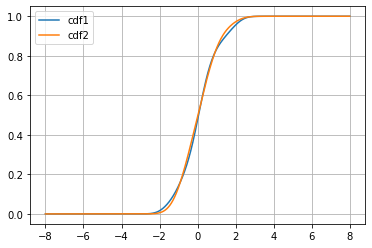

In [ ]:
cdf1 =  cdf (x,y1)
cdf2 =  cdf (x,y2)

plt.plot (x,cdf1)
plt.plot (x,cdf2)
plt.legend (("cdf1","cdf2"))
plt.grid (True)
plt.show()

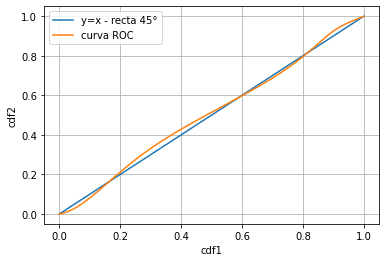

In [ ]:
#CURVAS ROC

plt.plot(cdf1,cdf1) #línea de 45 grados
plt.plot(cdf1,cdf2)
plt.xlabel ("cdf1")
plt.ylabel ("cdf2")
plt.grid (True)
plt.legend (("y=x - recta 45°","curva ROC"))
plt.show()

In [ ]:
from FAreabajolacurvaROC import AUC

AUC (cdf1,cdf2)

importing Jupyter notebook from FAreabajolacurvaROC.ipynb


0.49300466625365214

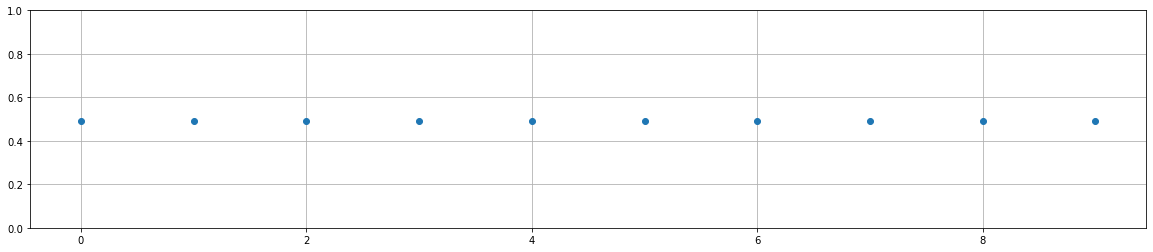

In [ ]:
Area_AUC = np.empty(0)

for i in range (0,5):
    for j in range (i+1,5):
        Area_AUC = np.append (Area_AUC, AUC (cdf1,cdf2))


plt.figure(figsize=(20,4))
plt.plot(Area_AUC,'o')
plt.grid (True)
plt.ylim (0,1)
plt.show()

#### Cuánto más parecidas sean, más similar a la recta de 45°. Cuánto más se parezcan cdf1 y cdf2, más próxima a 1/2 será el área bajo la curva ROC. En este caso el área bajo las curvas ROC es de 0.49300466625365214, lo cual indican que y1 con y2 con bastante similares.

In [ ]:
from FOverlapping_Index import area

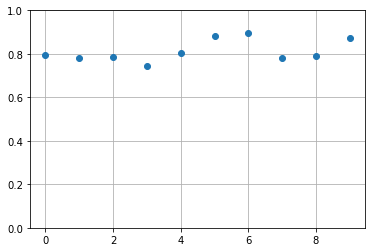

In [ ]:
Area_50ms = np.empty (0)
for i in range (0,5):
    for j in range (i+1,5):
        Area_50ms = np.append (Area_50ms, area (x,y[:,i],y[:,j]))

plt.plot (Area_50ms,"o")
plt.grid (True)
plt.ylim(0,1)
plt.show ()

In [ ]:
DE = np.std (Area_50ms)
print (DE)

0.0486378854246133


### Como el Desvio estandar es: 0.0486378854246133. Y como que los valores se encuentran proximos a 1, se pueden considerar a las señales iguales. 

### Podríamos decir que señal es estacionaria para segmentos de 700ms.